In [1]:
import pandas as pd # For dataframes (tables)
import numpy as np # For numerical operations
import math 
import matplotlib.pyplot as plt # For plots
import seaborn as sns
import os # To import external python files
import sys# To import external python files

from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv('tests/data/generated_7/container_usage.csv')
df.head(n=11)

,timestamp,container_id,machine_id,cpu,mem
0,0,c_0,n_0,5,5
1,1,c_0,n_0,3,3
2,2,c_0,n_0,5,5
3,3,c_0,n_0,2,2
4,4,c_0,n_0,5,5
5,5,c_0,n_0,3,3
6,0,c_1,n_0,5,5
7,1,c_1,n_0,2,2
8,2,c_1,n_0,5,5
9,3,c_1,n_0,7,7


## **Data Preprocessing**

In [3]:
print('Dataset information:\n')
df.info()

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   timestamp     42 non-null     int64 
 1   container_id  42 non-null     object
 2   machine_id    42 non-null     object
 3   cpu           42 non-null     int64 
 4   mem           42 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.8+ KB


In [4]:
df.isna().sum()

timestamp       0
container_id    0
machine_id      0
cpu             0
mem             0
dtype: int64

Here we can see that columns 'CREDIT_LIMIT' and 'MINIMUM PAYMENTS' contain null values. Next, we will visualize these two columns. 

Here we see that the data is not normally distributed, therefore we can fill the null values using the median value of their respective columns to save precious data.

Now our data does not contain any null values.

## **Feature Selection**

In [5]:
df.corr()

/tmp/ipykernel_6876/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,timestamp,cpu,mem
timestamp,1.000000,0.079708,0.083208
cpu,0.079708,1.000000,0.260703
mem,0.083208,0.260703,1.000000


/tmp/ipykernel_6876/2124274090.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


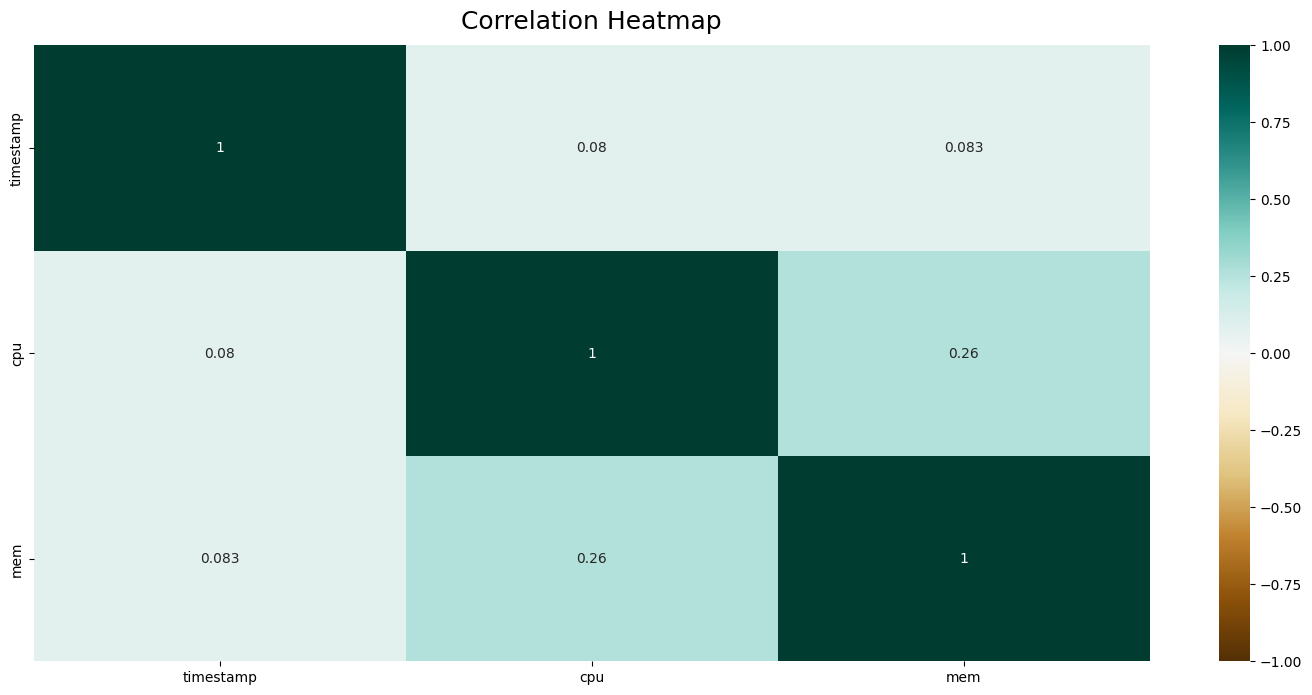

In [6]:
import seaborn as sns
plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
# plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [7]:
from sklearn.preprocessing import LabelEncoder

jobs_encoder = LabelEncoder()
jobs_encoder.fit(df['container_id'])
transformed = jobs_encoder.transform(df['container_id'])
ohe_df = pd.DataFrame(transformed, columns=['container'])
data = pd.concat([df, ohe_df], axis=1).drop(['container_id'], axis=1)
encoder = LabelEncoder()
encoder.fit(df['machine_id'])
transformed = encoder.transform(df['machine_id'])
ohe = pd.DataFrame(transformed, columns=['machine'])
data = pd.concat([data, ohe], axis=1).drop(['machine_id'], axis=1)
data

,timestamp,cpu,mem,container,machine
0,0,5,5,0,0
1,1,3,3,0,0
2,2,5,5,0,0
3,3,2,2,0,0
4,4,5,5,0,0
5,5,3,3,0,0
6,0,5,5,1,0
7,1,2,2,1,0
8,2,5,5,1,0
9,3,7,7,1,0


In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [9]:
score_list = []
clusters = np.arange(2, 9, dtype=int)
for c in clusters:
  kmeans = KMeans(n_clusters=c, init='k-means++', n_init=10, max_iter=100, random_state=0).fit(data)
  score = davies_bouldin_score(data, kmeans.labels_)
  score_list.append(score)

print(score_list)

[1.0523863207891726, 1.2016067162823274, 1.1880762295132081, 1.070759659297997, 1.125275280086534, 1.0040584279842892, 0.9876355968866966]


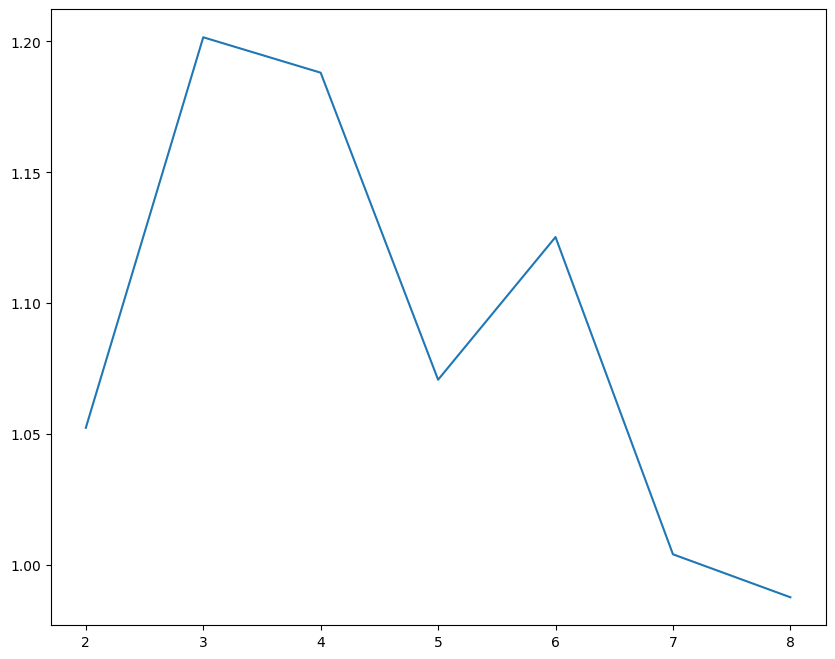

In [10]:
plt.figure(figsize=(10, 8))
plt.plot(clusters, score_list)

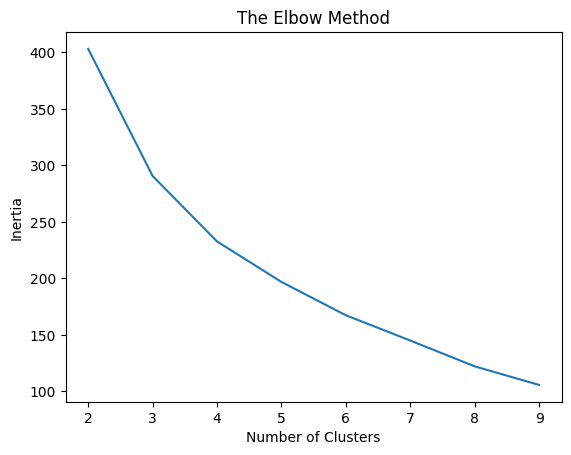

In [11]:
# calculate k using python, with the elbow method
inertia = []

# define our possible k values
possible_K_values = [i for i in range(2,10)]

# we start with 2, as we can not have 0 clusters in k means, and 1 cluster is just a dataset

# iterate through each of our values
for each_value in possible_K_values:
    
    # iterate through, taking each value from 
    model = KMeans(n_clusters=each_value, init='k-means++', n_init=10, max_iter=100, random_state=0)
    
    # fit it on YOUR dataframe
    model.fit(data)
    
    # append the inertia to our array
    inertia.append(model.inertia_)

plt.plot(possible_K_values, inertia)
plt.title('The Elbow Method')

plt.xlabel('Number of Clusters')

plt.ylabel('Inertia')

plt.show()

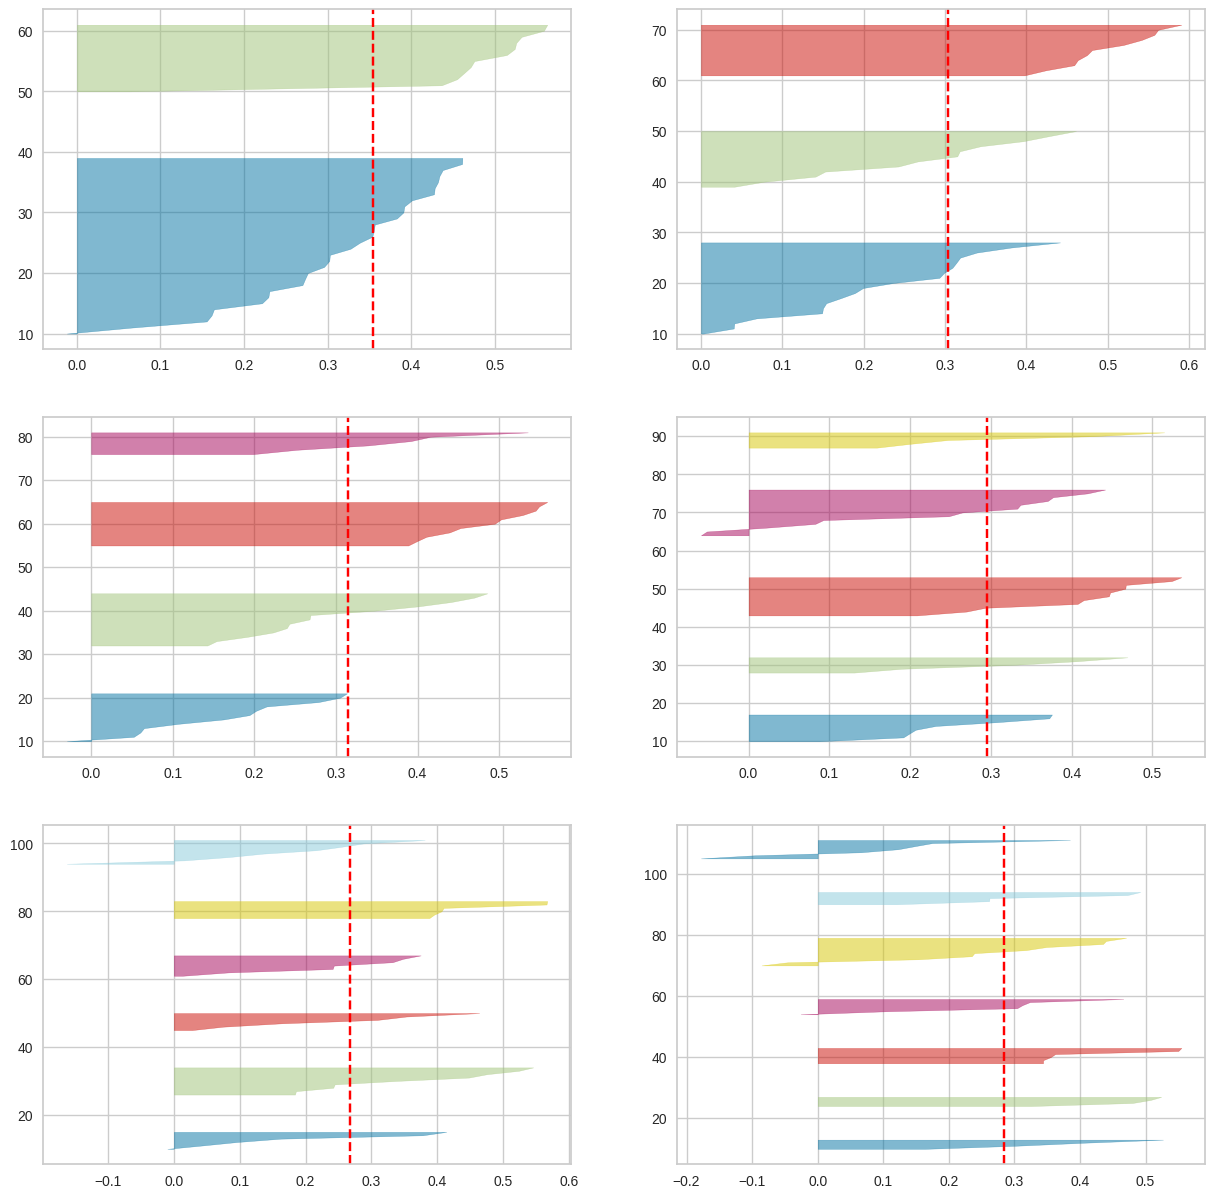

In [12]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(3, 2, figsize=(15,15))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data) 

In [13]:
kmeans = KMeans(3, init='k-means++', n_init=10, max_iter=100, random_state=0).fit(data)

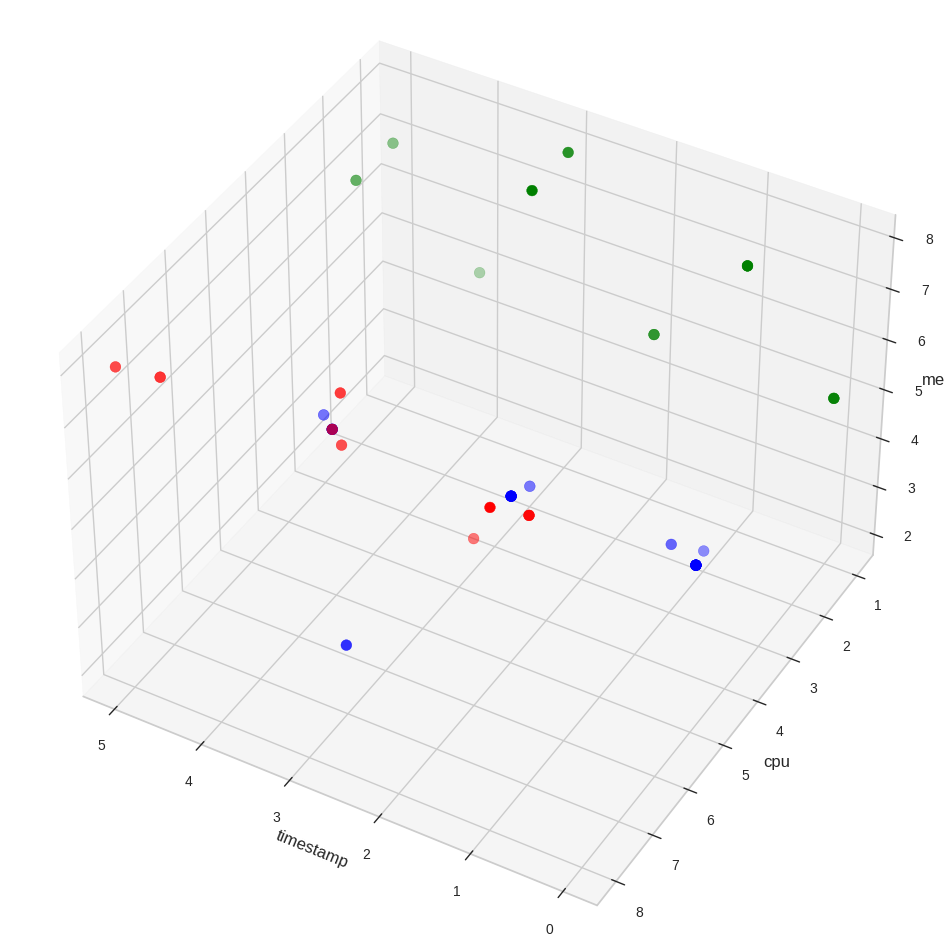

In [14]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
label= kmeans.labels_
ax.scatter(df["timestamp"][label == 0], df["cpu"][label == 0], df["mem"][label == 0], c='blue', s=60)
ax.scatter(df["timestamp"][label == 1], df["cpu"][label == 1], df["mem"][label == 1], c='red', s=60)
ax.scatter(df["timestamp"][label == 2], df["cpu"][label == 2], df["mem"][label == 2], c='green', s=60)
plt.xlabel("timestamp")
plt.ylabel("cpu")
ax.set_zlabel('mem')
ax.view_init(40, 120)

In [15]:
set(label)

{0, 1, 2}

In [16]:
new_df = data.copy(deep = True)
new_df['cluster'] = label

In [17]:
new_df

,timestamp,cpu,mem,container,machine,cluster
0,0,5,5,0,0,0
1,1,3,3,0,0,0
2,2,5,5,0,0,0
3,3,2,2,0,0,0
4,4,5,5,0,0,0
5,5,3,3,0,0,0
6,0,5,5,1,0,0
7,1,2,2,1,0,0
8,2,5,5,1,0,0
9,3,7,7,1,0,1


In [18]:
new_df.groupby(['cluster']).median()

,timestamp,cpu,mem,container,machine
cluster,,,,,
0,2.0,5.0,5.0,1.0,0.0
1,3.5,7.0,7.0,3.5,1.0
2,2.0,1.0,7.0,5.0,0.0


In [19]:
new_df.groupby(['cluster']).mean()

,timestamp,cpu,mem,container,machine
cluster,,,,,
0,2.157895,4.315789,4.105263,1.473684,0.473684
1,3.166667,6.583333,6.583333,3.166667,0.833333
2,2.363636,1.181818,6.272727,5.454545,0.454545


In [60]:
import plotly.express as px
new_df["cluster"] = new_df["cluster"].astype(str)
fig = px.scatter_3d(new_df, x='timestamp', y='cpu', z='mem', color='cluster', hover_data=['container', 'machine'], symbol='cluster', opacity=0.8)
fig.update_traces(marker_size = 4)
fig.update_coloraxes(showscale=False)
fig.show()

In [ ]:
# df["size"] = df["size"].astype(float)

<Axes: >

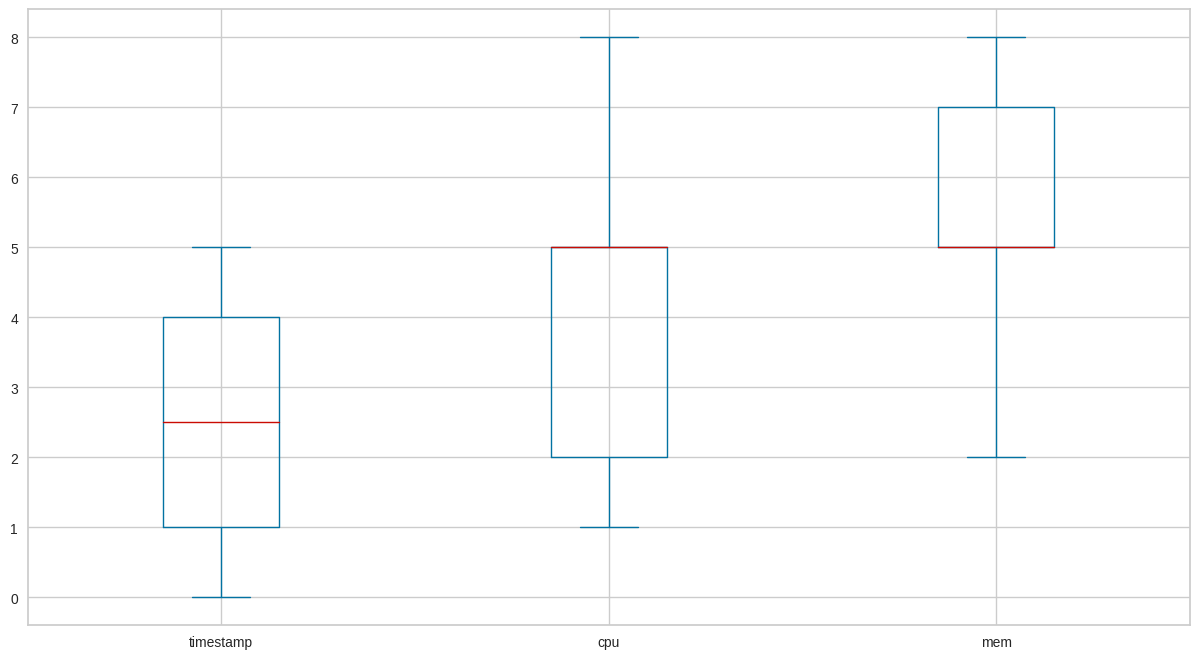

In [58]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(new_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled,index=new_df.index, columns=new_df.columns)

df.plot.box(figsize=(15, 8))

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# std_scaler = MinMaxScaler()
 
# df_scaled = std_scaler.fit_transform(new_df.to_numpy())
# df_scaled = pd.DataFrame(df_scaled,index=new_df.index, columns=new_df.columns)
# df_scaled.plot.box(figsize=(15, 8))

## **Agglomerative Hierarchical Clustering**

In [95]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [96]:
from yellowbrick.cluster import SilhouetteVisualizer

# Y = StandardScaler().fit_transform(df)
for i in [2, 3, 4, 5, 6, 7]:
    clustering = AgglomerativeClustering(n_clusters=i).fit(df)
    clustering.fit(df)
    labels = clustering.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("Silhouette Coefficient for different clusters",metrics.silhouette_score(df, clustering.labels_), n_clusters_)

Silhouette Coefficient for different clusters 0.4493530117877727 2
Silhouette Coefficient for different clusters 0.45927712938065773 3
Silhouette Coefficient for different clusters 0.44075616733331097 4
Silhouette Coefficient for different clusters 0.44284925167554917 5
Silhouette Coefficient for different clusters 0.42992320290929986 6
Silhouette Coefficient for different clusters 0.4075987226213097 7


In [97]:
clustering = AgglomerativeClustering(n_clusters=3).fit(df)

In [98]:
clustering.labels_
set(clustering.labels_)

{0, 1, 2}

In [99]:
new_df_2 = df.copy(deep = True)
new_df_2['cluster'] = clustering.labels_

In [100]:
new_df_2.groupby(['cluster']).mean()

,BALANCE,PURCHASES,PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,TENURE
cluster,,,,,,
0,2817.664151,1351.644184,0.521208,7995.114729,2498.190658,11.723651
1,777.877723,553.907677,0.465743,2295.034303,888.149150,11.390514
2,4266.221587,10151.476299,0.747678,12109.415584,16666.657287,11.863636


In [101]:
new_df.groupby(['cluster']).mean()

,BALANCE,PURCHASES,PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,TENURE
cluster,,,,,,
0,3143.099009,1553.979031,0.550691,8904.900539,2681.312727,11.756646
1,883.078669,592.072259,0.462279,2620.232088,1007.949587,11.417702
2,4860.480680,9812.728403,0.705850,12389.236111,17668.475967,11.854167


In [102]:
# fig = plt.figure(figsize=(15,5))
# ax = fig.add_subplot(111,  projection='3d')
fig = px.scatter_3d(df, df.CREDIT_LIMIT, df["BALANCE"], df["PURCHASES"], opacity=0.7)
# ax.scatter_3d(df.CREDIT_LIMIT, df["BALANCE"], df["PURCHASES"], s=60, hue=clustering.labels_)
fig.update_traces(marker_size = 3)
fig.show()

In [103]:
# fig = px.scatter_3d(df, df.CREDIT_LIMIT, df["BALANCE"], df["PURCHASES"], opacity=0.7)
fig = px.scatter_3d(df, df.CREDIT_LIMIT, df["BALANCE"], df["PURCHASES"],color=clustering.labels_, symbol=clustering.labels_, opacity=0.7)
fig.update_traces(marker_size = 3)
fig.show()

## **DBSCAN**

In [104]:
from sklearn.cluster import DBSCAN


In [105]:
eps=np.arange(0.6, 1.6, 0.05)
min_samples=np.arange(5,13,1)
Y = StandardScaler().fit_transform(df)
for ep, mns in zip(eps, min_samples):
    dbs=DBSCAN(eps=ep, min_samples=mns)
    dbs.fit(Y)
    labels = dbs.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("Silhouette Coefficient for eps and min_samples",ep,mns,metrics.silhouette_score(Y, dbs.labels_), n_clusters_)

Silhouette Coefficient for eps and min_samples 0.6 5 -0.13406081123898342 16
Silhouette Coefficient for eps and min_samples 0.65 6 -0.0773182267759125 12
Silhouette Coefficient for eps and min_samples 0.7000000000000001 7 -0.05812515770587845 9
Silhouette Coefficient for eps and min_samples 0.7500000000000001 8 0.20472410041065642 3
Silhouette Coefficient for eps and min_samples 0.8000000000000002 9 0.5027247984165811 1
Silhouette Coefficient for eps and min_samples 0.8500000000000002 10 0.5216496552763885 1
Silhouette Coefficient for eps and min_samples 0.9000000000000002 11 0.5351724598510023 1
Silhouette Coefficient for eps and min_samples 0.9500000000000003 12 0.5533390005637128 1


In [106]:
scaler = StandardScaler()
scaler = scaler.fit(df)

scaled_df = scaler.transform(df)
db = DBSCAN(eps=0.75, min_samples=8).fit(scaled_df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(scaled_df, labels))

Estimated number of clusters: 3
Estimated number of noise points: 652
Silhouette Coefficient: 0.205


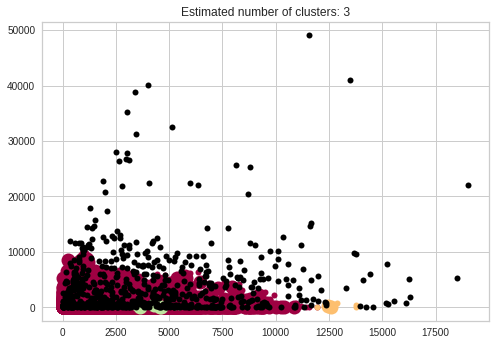

In [107]:
# Black removed and is used for noise instead.
unscaled_df = scaler.inverse_transform(scaled_df)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = unscaled_df[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = unscaled_df[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [108]:
db.labels_
set(db.labels_)
new_df_3 = df.copy(deep = True)
new_df_3['cluster'] = db.labels_
new_df_3.groupby(['cluster']).mean()

,BALANCE,PURCHASES,PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,TENURE
cluster,,,,,,
-1,4196.345045,4125.702883,0.606347,10207.949898,7233.976646,10.903374
0,1344.320347,759.183244,0.482040,4034.445695,1299.822207,11.568289
1,12844.700611,212.934286,0.154762,14000.000000,3263.313331,12.000000
2,4380.303722,43.800000,0.044444,6100.000000,841.381438,9.000000


In [109]:
new_df_3.groupby(['cluster']).median()

,BALANCE,PURCHASES,PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,TENURE
cluster,,,,,,
-1,3358.160073,1934.585,0.666667,9500.0,5045.624958,12.0
0,785.429991,332.820,0.428571,3000.0,777.890206,12.0
1,12596.421940,136.880,0.166667,14000.0,3167.870886,12.0
2,4359.564495,0.000,0.000000,5750.0,845.107979,9.0


### **Outliers**

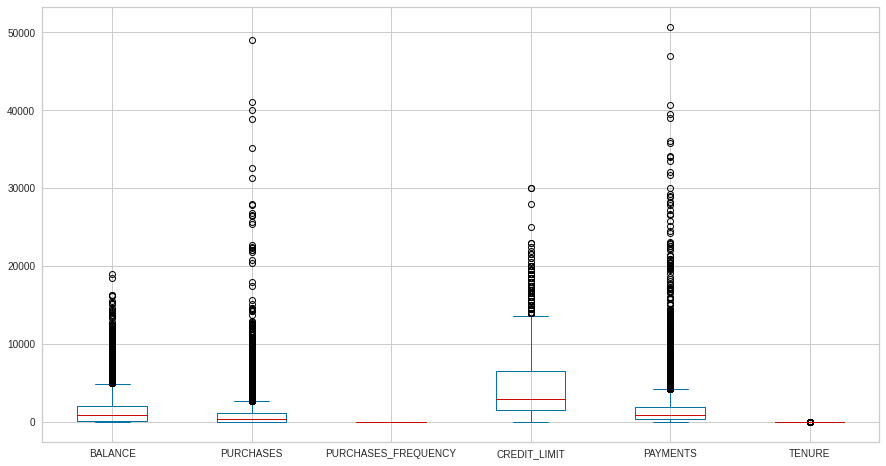

In [114]:
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled)

df.plot.box(figsize=(15, 8))

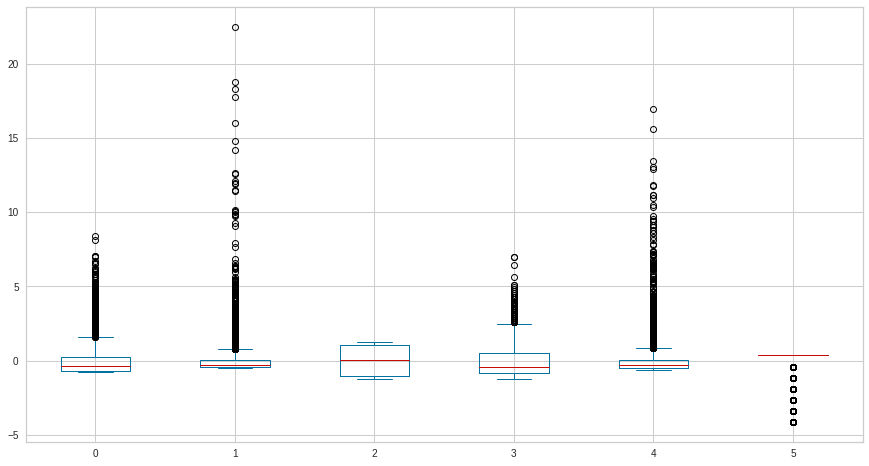

In [115]:
df_scaled.plot.box(figsize=(15, 8))

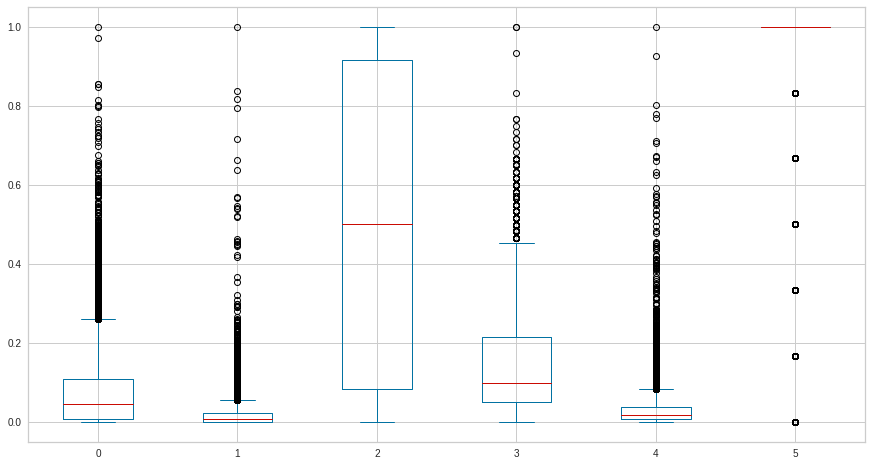

In [118]:
from sklearn.preprocessing import MinMaxScaler
std_scaler = MinMaxScaler()
 
df_scaled = std_scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled)
df_scaled.plot.box(figsize=(15, 8))